Title: **Predicting Newsletter Subscription based on Player Age, Experience and Hours Played**

Author: Helena Wu 

Student Number: 73311193

**Introduction**

The UBC Computer Science research team is running a Minecraft server to study how people interact within digital environments. To grow their research efforts, the team is interested in understanding what kinds of players are more likely to subscribe to their game-related newsletter. This insight will help them better target recruitment and engagement strategies. The question this report aims to study is: Can player characteristics and gameplay behaviour (such as experience level, playtime, age, and session activity) predict whether a player will subscribe to a game-related newsletter?

The analysis within this report uses two datasets:
`players.csv` and `sessions.csv`.

The `players.csv` dataset contains observations from 196 players and includes information such as name, hashed email, gender, age, experience level and whether the player subscribed.

**Variables within the players.csv dataset**:
  | Variable        | Type    | Description|
  |-----------------|---------|------------|
  | experience      | Categorical  | Player’s self-described skill level |
  | subscribe       | Logical      | If the player subscribed to the newsletter or not|
  | hashedEmail     | Character    | Player identifier |
  | played_hours    | Numeric      | Player’s total hours played |
  | name            | Character    | Player’s chosen in-game name |
  | gender          | Categorical  | Gender ( Male, Female, Other)|
  | Age             | Numeric      | Age in years |

The `sessions.csv` dataset contains 1535 play session records, such as start and end times.
**Variables within the sessions.csv dataset**:
  | Variable             | Type    | Description |
  |----------------------|---------|-------------|
  | hashedEmail          | Character  | Player identifier|
  | start_time           | Character  | Start timestamp|
  | end_time             | Character  | End timestamp|
  | original_start_time  | Numeric    | Start time in milliseconds|
  | original_end_time    | Numeric    | End time in milliseconds|


**Libraries:**

In [226]:
#please run the code below to attach the following libraries
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(janitor)

Loading the Data:

In [227]:
players_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


**Wrangling**

Processing the Data :
After loading the data, we can see the following issues within the data that need to be fixed:
- the 'hashedEmail' column should be removed to preserve anonymity (but is needed to join 'players.csv' and 'sessions.csv' tables together.
- some session_count observations data is missing (these are excluded from the analysis)
- Each value must have its own cell (`start_time` and `end_time`) have two values within, the date as well as time so it must be separated.

To answer the question if player characteristics and gameplay behaviour can predict whether a player will subscribe to a newsletter, we want to summarize the sessions data to find useful player behaviors such as session count and total play time.

In [253]:
sessions_data_clean <- sessions_data |>
separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
separate(end_time, into = c("end_date", "end_clock_time"), sep = " ") |>
  mutate(start_date = dmy(start_date),
    end_date = dmy(end_date)) |>
group_by(hashedEmail)

sessions_data_clean

hashedEmail,start_date,start_time,end_date,end_clock_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25,03:22,2024-07-25,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25,16:01,2024-05-25,16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-10,23:01,2024-05-10,23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,2024-07-01,04:08,2024-07-01,04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12




**Merging and Cleaning Player Data:**
- the `sessions_data_clean` and `players_data` datasets are merged
- `na`'s are dropped and not included within the dataset
- hashed_email and name is removed to remove player identifiers
- `original_start_time` and	`original_end_time` is removed and not used within the analysis because measurement units are unknown
- adjusted the `subscribe` column to answer either YES or NO (rather than TRUE or FALSE) for clarification
- Mutate subscribe to be a factor
- Mutate experience to a number (for the classification model)

In [273]:
merged_data <- players_data |>
left_join(sessions_data_clean, by = "hashedEmail") |>
clean_names() |>                                                           
drop_na(experience, subscribe, age, played_hours, experience) |>
filter(played_hours > 0) |>
  select(-hashed_email, -name, -original_start_time, -original_end_time) |>
mutate(subscribe = recode(as.character(subscribe), `TRUE` = "YES", `FALSE` = "NO"),
       subscribe = as_factor(subscribe),
       experience = factor(experience))

merged_data_adjusted <- merged_data |>
mutate(experience_adjusted = recode(experience, "Amateur" = 1,
                            "Beginner" = 2,
                               "Pro" = 3,
                              "Regular"= 4,
                             "Veteran" = 3)) 
merged_data_adjusted

experience,subscribe,played_hours,gender,age,start_date,start_time,end_date,end_clock_time,experience_adjusted
<fct>,<fct>,<dbl>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>,<dbl>
Pro,YES,30.3,Male,9,2024-08-08,00:21,2024-08-08,01:35,3
Pro,YES,30.3,Male,9,2024-09-09,22:30,2024-09-09,22:37,3
Pro,YES,30.3,Male,9,2024-08-08,02:41,2024-08-08,03:25,3
Pro,YES,30.3,Male,9,2024-09-10,15:07,2024-09-10,15:29,3
Pro,YES,30.3,Male,9,2024-05-05,22:21,2024-05-05,23:17,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,NO,2.3,Male,17,2024-09-08,20:04,2024-09-08,22:02,1
Amateur,NO,2.3,Male,17,2024-08-23,21:59,2024-08-23,22:06,1
Amateur,NO,2.3,Male,17,2024-09-09,02:17,2024-09-09,02:45,1


**Data Analysis:** #RETURN TO THIS AND WRITE DESCRIPTION

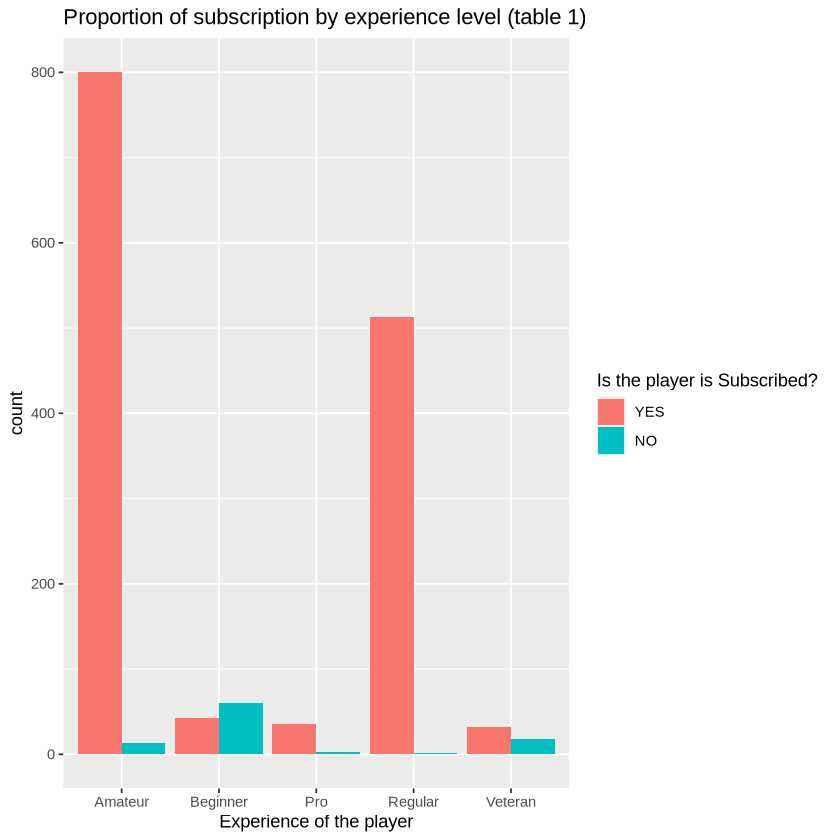

In [274]:
experience_plot <- merged_data |>
ggplot(aes(x=experience, fill = subscribe)) +
geom_bar(position = position_dodge()) +
labs(fill = "Is the player is Subscribed?") +
xlab("Experience of the player") + 
ggtitle("Proportion of subscription by experience level (table 1)")

experience_plot

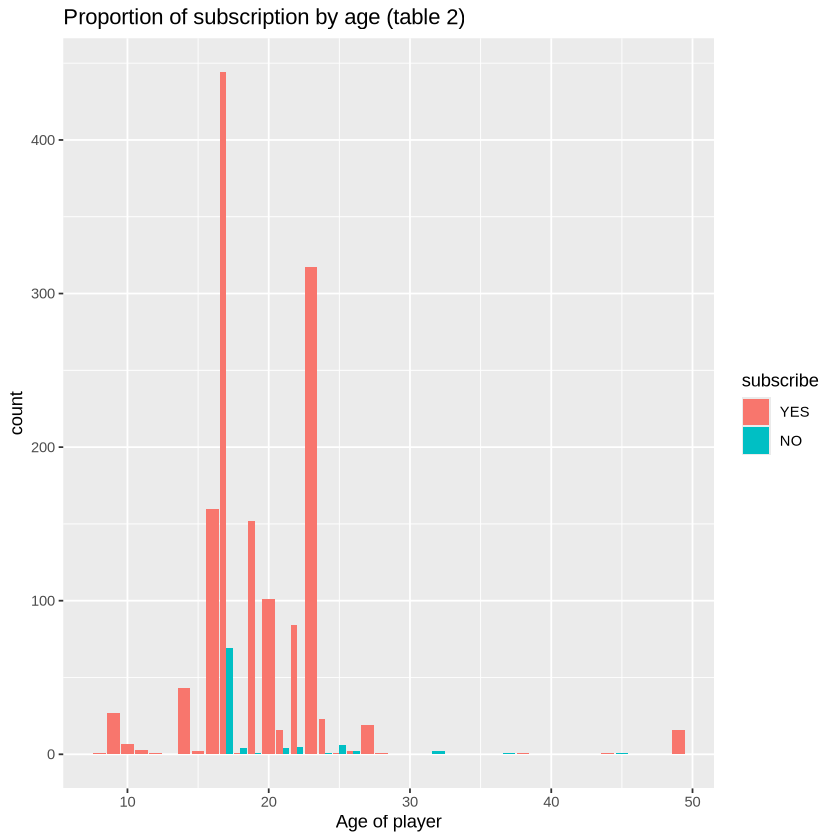

In [275]:
hours_played_plot <- ggplot(merged_data, aes(x = age,  fill = subscribe)) +
  geom_bar(position = position_dodge()) +
xlab("Age of player") +
labs(color = "Is the player subscribed?") +
ggtitle("Proportion of subscription by age (table 2)")
hours_played_plot

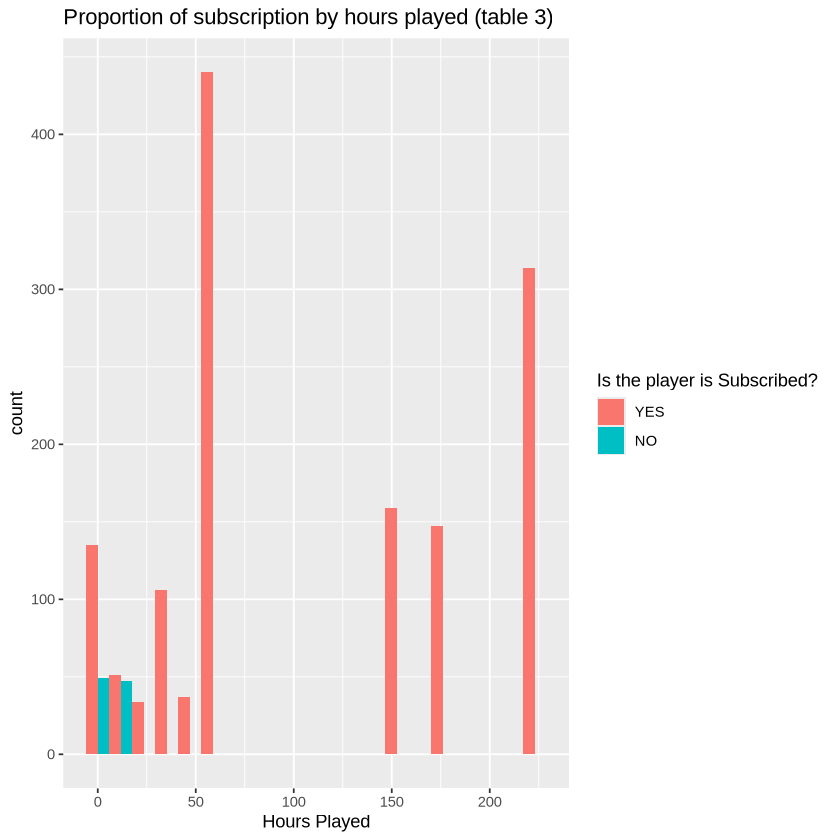

In [276]:
played_hours_plot <- merged_data |>
ggplot(aes(x=played_hours, fill = subscribe)) +
geom_histogram(position = "dodge", bins = 20) +
labs(fill = "Is the player is Subscribed?") +
xlab("Hours Played") + 
ggtitle("Proportion of subscription by hours played (table 3)")

played_hours_plot

**Modelling with KNN Classification**

Using cross validation to test for K.

In [247]:
# set.seed(1)

# minecraft_folds <- merged_data |>
# vfold_cv(v=5, strata=subscribe)

# knn_model <- nearest_neighbor(neighbors = tune(), weight_func = "rectangular") |>
#   set_engine("kknn") |>
#   set_mode("classification")


# subscribe_recipe <- recipe(subscribe ~ age + played_hours + experience, data = merged_data) |>
# step_dummy(all_nominal_predictors()) |>
# step_scale(all_predictors()) |>
# step_center(all_predictors())


# knn_workflow <- workflow() |>
#   add_recipe(subscribe_recipe) |>
#   add_model(knn_model)

# neighbor_grid <- tibble(neighbors = 1:10)

# knn_tune <- knn_workflow |>
# tune_grid(resamples = minecraft_folds, grid = neighbor_grid, metrics = metric_set(accuracy))

# knn_tune |> 
# collect_metrics() |>
# filter(.metric == "accuracy") |>
# arrange(desc(mean))

# print(knn_tune)
     

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9881557,5,0.002670644,Preprocessor1_Model01
3,accuracy,binary,0.9842062,5,0.003509351,Preprocessor1_Model03
4,accuracy,binary,0.9842062,5,0.003509351,Preprocessor1_Model04
2,accuracy,binary,0.9842018,5,0.001607980,Preprocessor1_Model02
5,accuracy,binary,0.9809124,5,0.002626703,Preprocessor1_Model05
6,accuracy,binary,0.9809124,5,0.002626703,Preprocessor1_Model06
7,accuracy,binary,0.9795966,5,0.003658721,Preprocessor1_Model07
8,accuracy,binary,0.9795966,5,0.003658721,Preprocessor1_Model08
9,accuracy,binary,0.9716997,5,0.004827879,Preprocessor1_Model09


# Tuning results
# 5-fold cross-validation using stratification 
# A tibble: 5 × 4
  splits             id    .metrics          .notes          
  <list>             <chr> <list>            <list>          
1 <split [1215/304]> Fold1 <tibble [10 × 5]> <tibble [0 × 3]>
2 <split [1215/304]> Fold2 <tibble [10 × 5]> <tibble [0 × 3]>
3 <split [1215/304]> Fold3 <tibble [10 × 5]> <tibble [0 × 3]>
4 <split [1215/304]> Fold4 <tibble [10 × 5]> <tibble [0 × 3]>
5 <split [1216/303]> Fold5 <tibble [10 × 5]> <tibble [0 × 3]>


In [307]:
set.seed(1)

merged_data_scaled <- merged_data_adjusted |>
mutate(scaled_age = scale(age, center = TRUE),
       scaled_played_hours = scale(played_hours, center = TRUE),
       scaled_experience = scale(experience_adjusted, center = TRUE))


data_split <- initial_split(merged_data_adjusted, prop= 0.75, strata = subscribe)
data_train <- training (data_split)
data_test <- testing (data_split)

data_recipe <- recipe(subscribe ~ age + experience_adjusted + played_hours, data = merged_data_adjusted) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

data_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
set_engine("kknn") |>
set_mode ("classification") 

data_vfold <- vfold_cv(merged_data_adjusted, v=5, strata = subscribe)

data_resample_fit <- workflow() |>
add_recipe(data_recipe) |>
add_model(knn_spec) |>
fit_resamples(resamples = data_vfold)

data_metrics <- data_resample_fit |>
collect_metrics()




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



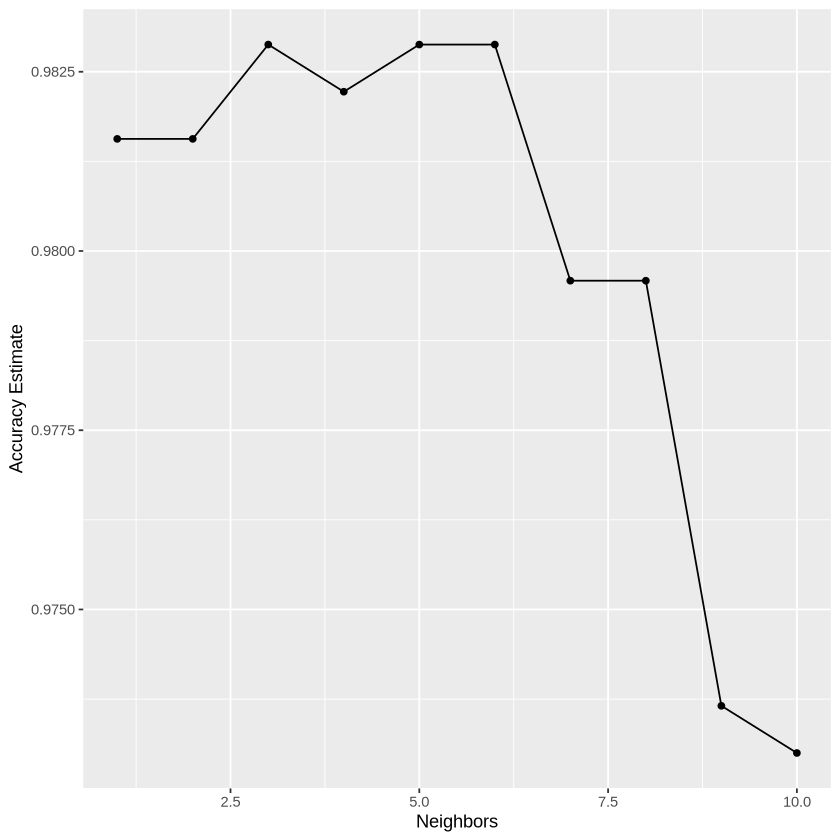

In [309]:
#Parameter Value Selection

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
      add_recipe(data_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = data_vfold, grid = k_vals) |>
collect_metrics()

accuracies <- knn_results |> 
       filter(.metric == "accuracy")

accuracy_versus_k <- accuracies |>
ggplot(aes(x = neighbors, y = mean))+
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_versus_k

Choosing K:
By looking at the `accuracy_versus_k` plot, we can see that when K= approx 3, 5 or 6, the accuracy is the highest. For this report, K=5 will be used.

In [311]:
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
      set_engine("kknn") |>
       set_mode("classification")

data_fit <- workflow() |>
add_recipe(data_recipe) |>
add_model(knn_spec) |>
fit(data= data_train)

data_test_predictions <- predict(data_fit, data_test) |>
bind_cols(data_test)

data_test_predictions

.pred_class,experience,subscribe,played_hours,gender,age,start_date,start_time,end_date,end_clock_time,experience_adjusted
<fct>,<fct>,<fct>,<dbl>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>,<dbl>
YES,Pro,YES,30.3,Male,9,2024-09-09,22:30,2024-09-09,22:37,3
YES,Pro,YES,30.3,Male,9,2024-04-06,22:24,2024-04-06,23:33,3
YES,Pro,YES,30.3,Male,9,2024-08-03,02:30,2024-08-03,03:54,3
YES,Pro,YES,30.3,Male,9,2024-04-08,01:17,2024-04-08,01:43,3
YES,Pro,YES,30.3,Male,9,2024-09-09,22:51,2024-09-10,00:40,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YES,Amateur,YES,32.0,Male,22,2024-06-05,01:46,2024-06-05,01:52,1
YES,Amateur,YES,32.0,Male,22,2024-04-23,04:30,2024-04-23,04:58,1
YES,Regular,NO,0.1,Male,18,2024-06-29,21:05,2024-06-29,21:15,4


In [313]:
data_prediction_accuracy <- data_test_predictions |>
metrics(truth = subscribe, estimate = .pred_class)

data_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9763158
recall,binary,0.9830986


**Confusion Matrix**
